In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
np.random.seed(42) 
_PATH_IN = "4-5_Data"
_PATH_OUT = "4-5_Output"
_Y_Label = "Is_Female"

# Exploration 

In [4]:
df = pd.read_csv(f"{_PATH_IN}/characters_cleaned.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)
df.columns

Index(['A', 'B', 'P', 'DA', 'MA', 'MC', 'PA', 'SC', 'SK', 'Age_range',
       'Playable', 'Sexualization', 'Romantic_Interest', 'Is_Female'],
      dtype='object')

In [316]:
df.head(20)

,A,B,P,DA,MA,MC,PA,SC,SK,Age_range,Playable,Sexualization,Romantic_Interest,Is_Female
0,0,0,1,0,0,0,1,0,0,5,1,0,0.0,1
1,0,0,1,0,0,0,0,1,0,7,0,0,0.0,1
2,0,0,1,0,0,0,0,1,0,5,0,0,0.0,1
3,0,1,0,0,0,1,0,0,0,3,0,0,0.0,1
4,1,0,0,0,0,0,0,1,0,5,0,0,0.0,1
5,0,0,1,0,0,1,0,0,0,5,0,2,1.0,1
6,0,0,1,1,0,0,0,0,0,3,0,0,0.0,1
7,0,0,1,1,0,0,0,0,0,0,0,2,0.0,1
8,0,0,1,1,0,0,0,0,0,2,0,0,0.0,1
9,0,0,1,0,0,1,0,0,0,5,0,1,1.0,1


In [318]:
for numerical in df.columns:
    print(f"{numerical}:")
    print(f"\t Mean              : {'{0:.2g}'.format(df[numerical].mean())}")
    print(f"\t Median            : {'{0:.2g}'.format(df[numerical].median())}")
    print(f"\t Standard Deviation: {'{0:.2g}'.format(df[numerical].std())}")
    print(f"\t Min               : {'{0:.2g}'.format(df[numerical].min())}")
    print(f"\t Max               : {'{0:.2g}'.format(df[numerical].max())}")
    print(df[numerical].value_counts())
    print()

A:
	 Mean              : 0.22
	 Median            : 0
	 Standard Deviation: 0.41
	 Min               : 0
	 Max               : 1
0    467
1    129
Name: A, dtype: int64

B:
	 Mean              : 0.12
	 Median            : 0
	 Standard Deviation: 0.33
	 Min               : 0
	 Max               : 1
0    523
1     73
Name: B, dtype: int64

P:
	 Mean              : 0.66
	 Median            : 1
	 Standard Deviation: 0.47
	 Min               : 0
	 Max               : 1
1    394
0    202
Name: P, dtype: int64

DA:
	 Mean              : 0.03
	 Median            : 0
	 Standard Deviation: 0.17
	 Min               : 0
	 Max               : 1
0    578
1     18
Name: DA, dtype: int64

MA:
	 Mean              : 0.082
	 Median            : 0
	 Standard Deviation: 0.27
	 Min               : 0
	 Max               : 1
0    547
1     49
Name: MA, dtype: int64

MC:
	 Mean              : 0.33
	 Median            : 0
	 Standard Deviation: 0.47
	 Min               : 0
	 Max               : 1
0    398
1    1

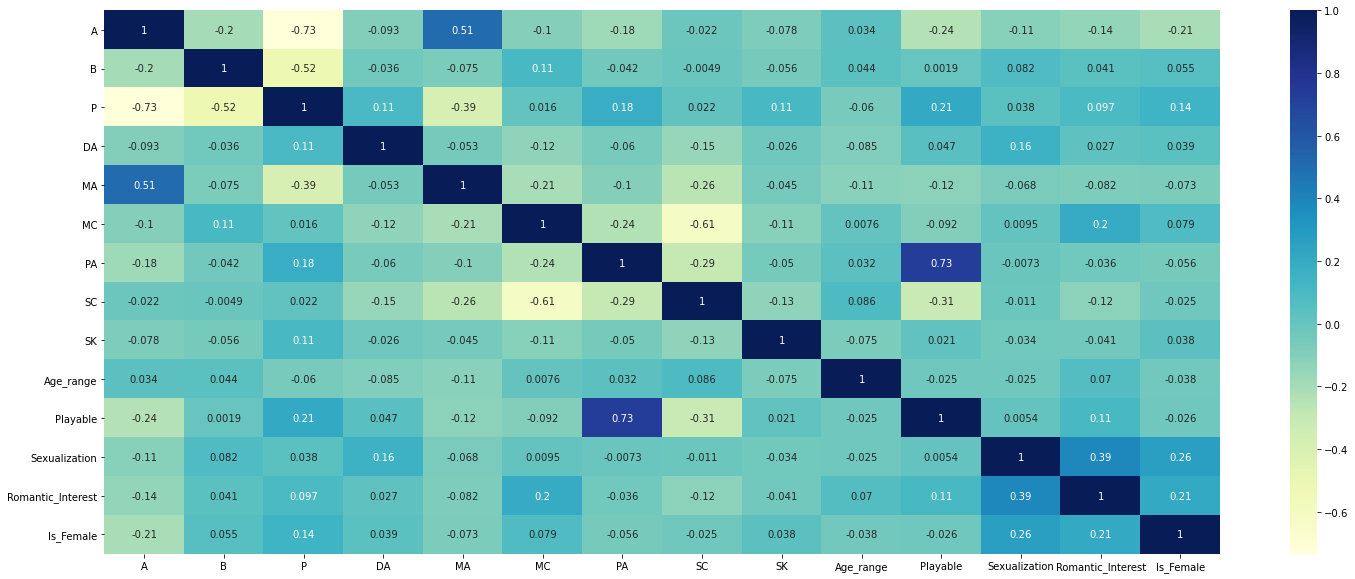

In [321]:
plt.figure(figsize=(25,10))
plot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
fig = plot.get_figure()
fig.savefig(f"{_PATH_OUT}/HeatMap.png") 

/Users/cameliaguerraoui/.pyenv/versions/anaconda3-2021.05/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 88.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


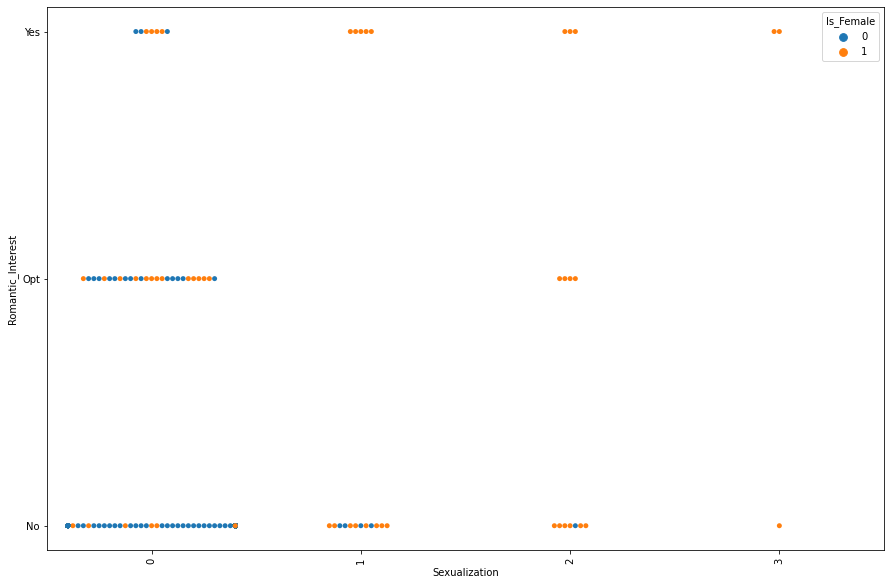

In [331]:
plt.figure(figsize=(15,10))
fig = sns.swarmplot(data=df, x="Sexualization", y="Romantic_Interest", hue="Is_Female")
fig.set_xticks(np.arange(0, len(df["Sexualization"].unique())))
fig.set_yticks([0, 0.5, 1])
fig.set_yticklabels(["No", "Opt", "Yes"])
plt.xticks(rotation=90)
plt.show()

# Classification Modeling

## Separation

In [5]:
X = df.drop(_Y_Label, axis=1)
y = df[_Y_Label]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4)

print("Selected Ratio: 1/4")
print()
print("Total Training Set: ", len(X_train))
print("Count Training Set: ")
print(y_train.value_counts())
print()
print("Total Test Set: ", len(X_test))
print("Count Test Set: ")
print(y_test.value_counts())

Selected Ratio: 1/4

Total Training Set:  447
Count Training Set: 
0    294
1    153
Name: Is_Female, dtype: int64

Total Test Set:  149
Count Test Set: 
0    99
1    50
Name: Is_Female, dtype: int64


In [6]:
label_att = y_train
label_att_test = y_test
regular_att = X_train
regular_att_test = X_test

In [7]:
def _train(classifier, verbose= True) -> None:
    classifier.fit(regular_att, label_att)
    prediction = classifier.predict(regular_att_test)
    accuracy = accuracy_score(prediction, label_att_test)
    conf_matrix = confusion_matrix(prediction, label_att_test)
    if verbose:
        print(f'\nAccuracy: {accuracy*100:.3f}%')
        print(conf_matrix)
    return accuracy

## Decision Tree


Accuracy: 66.443%
[[99 50]
 [ 0  0]]



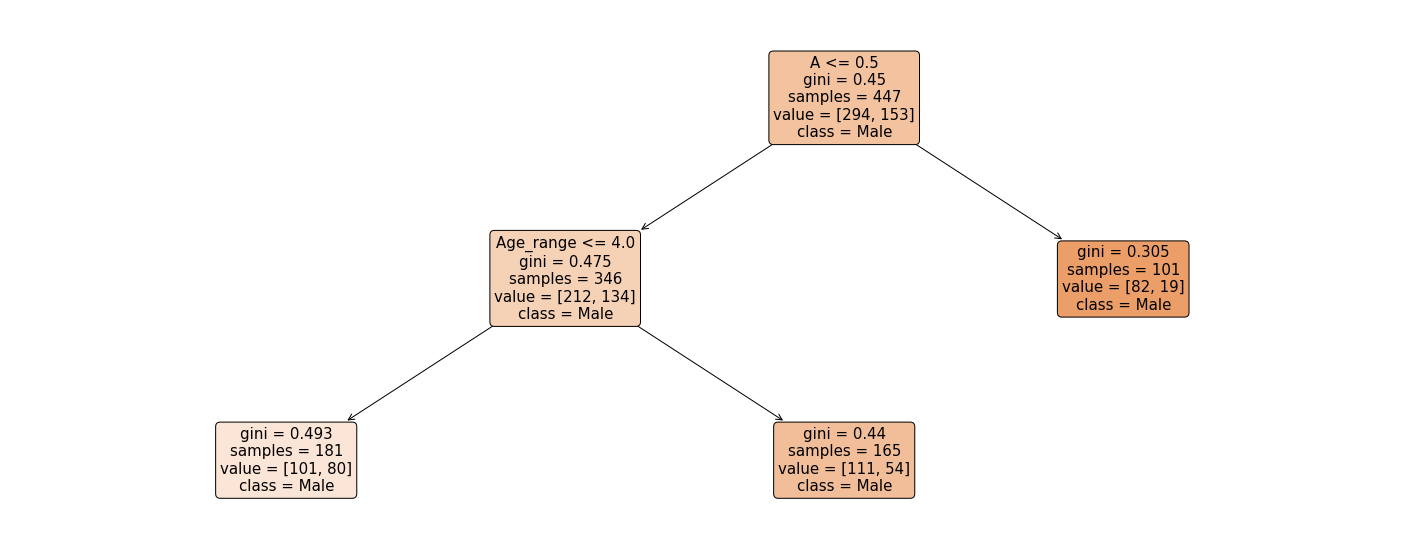

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

decision_tree = DecisionTreeClassifier(
    criterion="gini",
    max_depth=4,
    min_samples_leaf=100,
    min_impurity_decrease=0.003
    )

_train(decision_tree)

plt.figure(figsize=(25,10))
tree.plot_tree(decision_tree,
                feature_names=X_train.columns,
               class_names=["Male", "Female"],
               filled = True,
               rounded = True,
               fontsize = 15)
print()

## k-Nearest Neighbor

In [423]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = KNeighborsClassifier(
    n_neighbors=16,
    p=1,
)
_train(neighbors)


Accuracy: 71.141%
[[98 42]
 [ 1  8]]


0.7114093959731543

## Naives Bayes

In [425]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import GaussianNB

bayes = GaussianNB()

bayes = CategoricalNB(
    alpha=7,
)
_train(bayes)
print("Category Count:", bayes.category_count_)
print("Class Count: ", bayes.class_count_)


Accuracy: 71.812%
[[96 39]
 [ 3 11]]
Category Count: [array([[212.,  82.],
       [134.,  19.]]), array([[267.,  27.],
       [132.,  21.]]), array([[109., 185.],
       [ 40., 113.]]), array([[287.,   7.],
       [150.,   3.]]), array([[266.,  28.],
       [144.,   9.]]), array([[209.,  85.],
       [ 91.,  62.]]), array([[258.,  36.],
       [145.,   8.]]), array([[161., 133.],
       [ 87.,  66.]]), array([[289.,   5.],
       [148.,   5.]]), array([[102.,   1.,  18.,  15.,   0., 138.,   0.,  20.],
       [ 64.,   1.,   7.,  16.,   0.,  61.,   0.,   4.]]), array([[239.,  55.],
       [134.,  19.]]), array([[289.,   4.,   1.,   0.],
       [131.,   9.,  10.,   3.]]), array([[292.,   2.],
       [142.,  11.]])]
Class Count:  [294. 153.]


## Artificial Neural Network

In [644]:
len(regular_att.columns)+1

14

In [763]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(10,6),
    activation="relu",
    learning_rate_init=0.1,
    momentum=0.9,
    max_iter=200,
    epsilon=1e-6
)
_train(mlp)


Accuracy: 71.141%
[[98 42]
 [ 1  8]]


0.7114093959731543

## Support Vector Machine

In [734]:
from sklearn.svm import SVC

svc = SVC(
    kernel="rbf",
    C=1,
)
accuracy = _train(svc)


Accuracy: 70.470%
[[99 44]
 [ 0  6]]


## Boosting

In [824]:
from sklearn.ensemble import AdaBoostClassifier

boosting = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=11
    )
_train(boosting)


Accuracy: 72.483%
[[97 39]
 [ 2 11]]


0.7248322147651006

In [775]:
t = []
for i in range(1000, 2000, 100):
    boosting = AdaBoostClassifier(
        base_estimator=bayes,
        n_estimators=i,
        )
    t.append(_train(boosting, False))

t

[0.697986577181208,
 0.7181208053691275,
 0.7181208053691275,
 0.7114093959731543,
 0.7046979865771812,
 0.7046979865771812,
 0.7046979865771812,
 0.7046979865771812,
 0.7046979865771812,
 0.7046979865771812]

In [778]:
boosting = AdaBoostClassifier(
    base_estimator=bayes,
    n_estimators=1100,
    )
_train(boosting)



Accuracy: 71.812%
[[95 38]
 [ 4 12]]


0.7181208053691275

## Random Forest

In [792]:
from sklearn.ensemble import RandomForestClassifier
t = []
for i in range(10, 100, 10):
    random_forest = RandomForestClassifier(
        n_estimators=i,
        max_features=None, #it means sqrt(n_features)
        bootstrap=True,
        max_samples=3,
    )
    t.append(_train(random_forest, False))

t

[0.6375838926174496,
 0.6577181208053692,
 0.6577181208053692,
 0.6510067114093959,
 0.6577181208053692,
 0.6375838926174496,
 0.6442953020134228,
 0.6644295302013423,
 0.6711409395973155]

In [863]:
random_forest = RandomForestClassifier(
    criterion="gini",
    max_depth=4,
    min_samples_leaf=24,
    min_impurity_decrease=0.003
    )
_train(random_forest)


Accuracy: 66.443%
[[99 50]
 [ 0  0]]


0.6644295302013423

In [861]:
random_forest = RandomForestClassifier(
    max_features=None
    )
_train(random_forest)


Accuracy: 67.114%
[[92 42]
 [ 7  8]]


0.6711409395973155

## Stacking

In [842]:
from sklearn.ensemble import StackingClassifier

classifier = StackingClassifier(
    estimators=[
    ("RandomForestClassifier", random_forest),
    ('Boosting', boosting),
    ('Support Vector Machine', svc),
    ('Artificial Neural Network', mlp),
    ('Naives Bayes', bayes),
    ('K Nearest Neighbor', neighbors),
    ('Decision Tree', decision_tree)
    ], 
    final_estimator=DecisionTreeClassifier(max_depth=2)
    )

_train(classifier)


Accuracy: 68.456%
[[98 46]
 [ 1  4]]


0.6845637583892618

In [858]:
classifier = StackingClassifier(
    estimators=[
        ('Boosting', boosting),
        ('Support Vector Machine', svc),
        ('Naives Bayes', bayes),
        ('K Nearest Neighbor', neighbors),
        ('Decision Tree', decision_tree)
    ], 
    final_estimator = AdaBoostClassifier(
            base_estimator=DecisionTreeClassifier(max_depth=1),
            n_estimators=11
        )
    )

_train(classifier)


Accuracy: 71.141%
[[98 42]
 [ 1  8]]


0.7114093959731543